In [108]:
import requests
import pandas as pd
import plotly.graph_objects as go

# Сбор данных

In [109]:
r = requests.get('https://nbviewer.org/github/rogovich/Data/blob/master/docs/Plotly_HW/FairVote%20-%20Press%20Room.html')
r

<Response [200]>

In [110]:
range(r.text.find('<br><br>Rank&nbsp'), r.text.find('* Source: Washington Post'))

range(15527, 22237)

In [111]:
range(r.text.find('<br><br>Rank&nbsp;&nbsp;&nbsp; State&nbsp;&nbsp;&nbsp; Ad'), r.text.find('* Source: <a href='))

range(24787, 28731)

In [112]:
range(r.text.find('<br>Year&nbsp'), r.text.find(' 16<br><br>As the'))

range(30236, 34473)

In [201]:
table_1 = r.text[15527:22237]
table_2 = r.text[24787:28731]
table_3 = r.text[30236:34473]
tables = []
tables.append(table_1)
tables.append(table_2)
tables.append(table_3)

In [220]:
n = 0

for table in tables:
    table = table.replace('&nbsp', ';')
    table = ';'.join([letter for letter in table.split(';') if len(letter)>0])
    if n == 0:
        a = []
        for i in table.split('<br>')[2:-2]:
            a.append([x.strip(' ') for x in i.split(';')])
        n += n+1
    elif n == 1:
        b = []
        for i in table.split('<br>')[2:-1]:
            b.append([x.strip(' ') for x in i.split(';')])
        n += n+2
    elif n == 4:
        c = []
        for i in table.split('<br>')[1:]:
            c.append([x.strip(' ') for x in i.split(';')])

In [221]:
table_1 = pd.DataFrame(a[1:-1], columns=a[0])
table_2 = pd.DataFrame(b[1:-1], columns=b[0])
table_3 = pd.DataFrame(c[1:-1], columns=c[0])
object_tables = [table_1, table_2, table_3]

In [225]:
table_2['Ad $ spent'] = [x[1:].replace(',', '') for x in table_2['Ad $ spent']] # перевод столбцов в цифровой формат для дальнейшего удобства визуализации
for table in object_tables:
    for column in table.columns:
        if column != 'State':
            table[column] = pd.to_numeric(table[column])

In [205]:
table_1.to_csv('table_1.csv', index=False)
table_2.to_csv('table_2.csv', index=False)
table_3.to_csv('table_3.csv', index=False)

# Визуализация данных

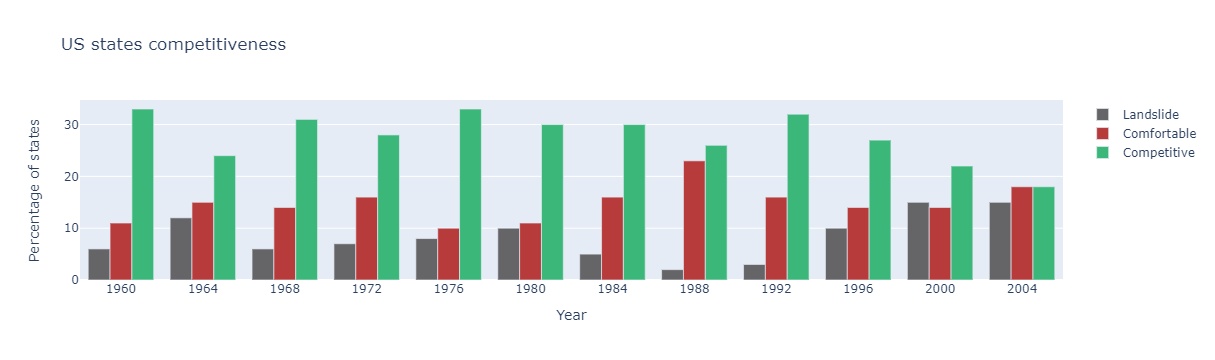

In [160]:
trace0 = go.Bar(x=table_3.Year,
                y=table_3.Landslide,
                name='Landslide',
                marker=dict(color='#656466'))

trace1 = go.Bar(x=table_3.Year,
                y=table_3.Comfortable,
                name='Comfortable',
                marker=dict(color='#b83b3b'))

trace2 = go.Bar(x=table_3.Year,
                y=table_3.Competitive,
                name='Competitive',
                marker=dict(color='#3bb879'))

layout = go.Layout(title='US states competitiveness', xaxis=dict(title='Year'), yaxis=dict(title='Percentage of states'))

fig = go.Figure([trace0, trace1, trace2], layout)
fig.show()


Исходя из вышепредставленного, визуально мы наблюдаем тренд снижения количества реально политически-конкурентных штатов. Их количество снизилось за 40 лет более, чем на треть, в то время как landslide штаты более, чем двукратно увеличились, а comfortable штаты также отметились ростом на около 50% к общему количеству.

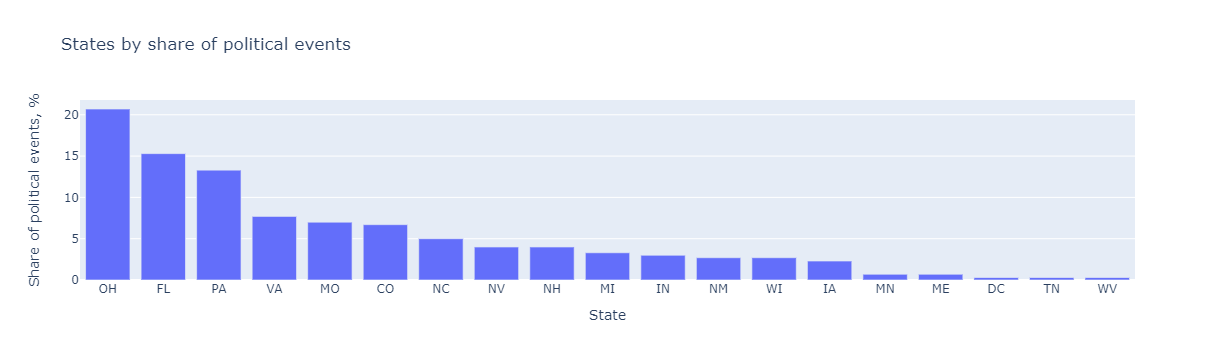

In [197]:
trace = go.Bar(x=table_1.State,
               y=table_1['% of total'])

layout = go.Layout(title="States by share of political events",
                   xaxis=dict(title='State'),
                   yaxis=dict(title='Share of political events, %'))

fig = go.Figure(trace, layout)

# fig.update_layout(xaxis={'categoryorder':'total ascending'})

fig.show()

In [170]:
percent = table_1['% of total'][0:10].sum()

In [171]:
print(f'{percent} - кумулятивный процент политических мероприятий в 10 наиболее активных штатах')

87.0 - кумулятивный процент политических мероприятий в 10 наиболее активных штатах


Исходя из визуализации мы обнаруживаем, что всего лишь в 10 штатов из 50 проходит практически вся (87%) предвыборная политическая активность - штат Огайо, Флорида, Пенсильвания и так далее.

In [267]:
table_2.loc[17] = [18, 'Other', -1, (100 - table_2['% of total'].sum()), 100] # чтобы сумма трат была равна 100%

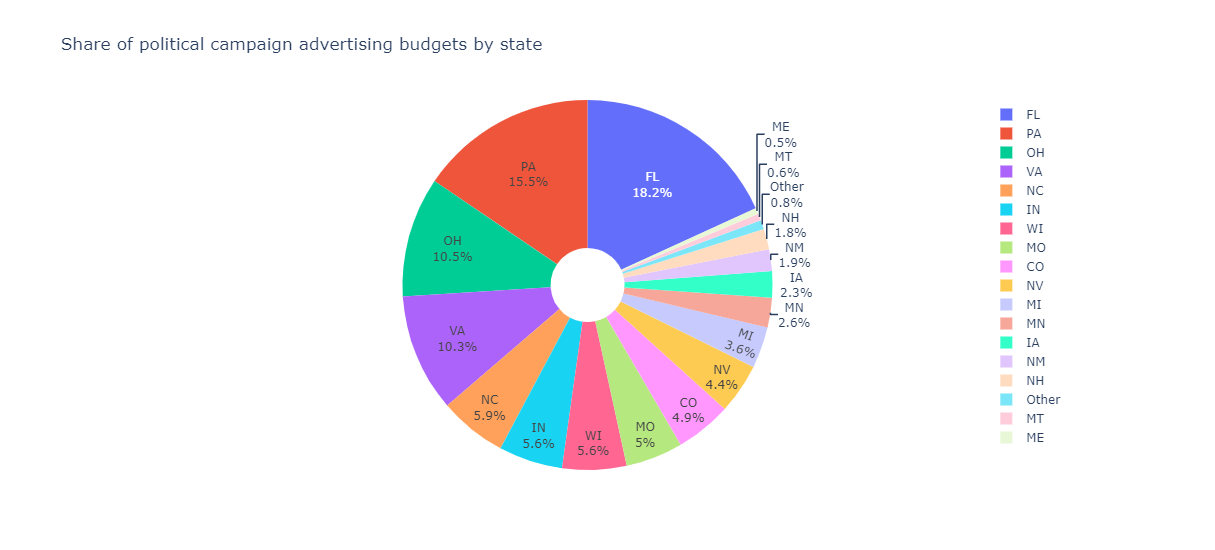

In [270]:
trace = go.Pie(labels=table_2.State, values=table_2['% of total'], hole=0.2, textinfo='label+percent', sort=True)

layout = go.Layout(title='Share of political campaign advertising budgets by state')

fig = go.Figure(trace, layout)

fig.update_layout(
    autosize=False,
    width=800,
    height=550)

fig.show()

Опять же, наблюдая визуальное представление траты рекламных бюджетов на отдельные штаты, становится заметно, что распределение этих трат явно не эгалитарное или пропорциональное населению, но оно скорее "коррелирует" со штатами, в которых наблюдается наиболее активные предвыборные кампании.

# Работа с таблицами

In [412]:
campaign = pd.read_excel('https://github.com/rogovich/Data/blob/master/docs/Plotly_HW/2008_campaign_data.xlsx?raw=true')

In [413]:
campaign['All_Visits'] = campaign.Dem_Visits + campaign.Rep_Visits
campaign['All_Air'] = campaign.Obama_Air + campaign.McCain_Air + campaign.Other_Air
campaign['PerCapita_Spend'] = (campaign.Obama_Spend + campaign.McCain_Spend + campaign.Other_Spend) / campaign.StatePop

In [414]:
survey = pd.read_excel('https://github.com/rogovich/Data/blob/master/docs/Plotly_HW/naes_phone.xlsx?raw=true')

In [415]:
survey = survey[['WFc01_c', 'MC01_c', 'MC02_c', 'MC03_c', 'MC04_c']]
survey

,WFc01_c,MC01_c,MC02_c,MC03_c,MC04_c
0,39,2,998,1,3
1,48,3,1,1,3
2,51,3,1,2,3
3,53,3,1,1,3
4,42,3,1,1,3
...,...,...,...,...,...
3732,4,3,1,2,3
3733,35,3,1,1,3
3734,39,2,2,1,3
3735,26,3,2,1,3


In [416]:
# если случайно запустить более одного раза, то придется перезагружать изначальные данные

survey['state'] = survey['WFc01_c']
survey['law'] = [x*0 if x in [1, 2, 998, 999] else 1 for x in survey['MC01_c']]
survey['veto'] = [x*0 if x in [2, 998, 999] else 1 for x in survey['MC02_c']]
survey['congress'] = [x*0 if x in [2, 998, 999] else 1 for x in survey['MC03_c']]
survey['justices'] = [x*0 if x in [1, 2, 4, 998, 999] else 1 for x in survey['MC04_c']]

survey = survey[['state', 'law', 'veto', 'congress', 'justices']]

In [ ]:
survey = survey.assign(PK = (survey.law + survey.veto + survey.congress + survey.justices) / 4)

In [438]:
for i in survey.state:
    survey.PK = 

39
48
51
53
42
13
1
6
33
34
39
1
38
30
42
36
17
13
34
20
9
19
12
36
41
48
48
41
17
18
13
26
37
12
36
1
6
51
5
36
37
27
25
6
12
10
12
26
40
46
6
13
48
29
6
27
42
48
41
48
49
24
39
48
4
6
36
19
36
20
29
55
26
51
27
22
6
24
22
6
36
9
29
6
45
17
6
6
28
6
39
12
12
39
51
25
4
42
6
36
47
6
42
1
39
48
53
17
55
24
32
12
4
36
37
45
47
41
18
6
47
34
17
42
39
6
36
12
18
21
55
39
53
30
39
21
20
26
6
42
54
19
18
39
51
17
6
13
24
51
24
48
39
47
27
30
27
53
6
18
48
39
48
12
36
42
27
54
39
31
29
6
29
28
37
29
18
19
36
17
42
47
51
1
17
37
26
31
41
8
36
21
42
55
42
8
6
54
24
6
6
48
17
26
17
6
27
23
26
29
40
9
28
29
53
12
48
42
39
24
42
16
5
40
24
36
48
36
21
28
55
48
51
37
40
11
29
39
1
13
37
8
34
12
48
36
24
42
33
48
12
37
55
39
51
27
36
41
51
17
39
48
18
36
1
31
42
17
6
11
42
48
36
51
26
25
18
39
55
29
36
13
48
42
6
6
25
11
6
39
27
19
42
51
39
34
51
36
39
24
8
37
6
39
39
1
55
48
48
19
48
6
42
26
48
48
55
39
37
56
9
25
56
4
39
18
48
36
47
26
54
42
26
1
48
42
1
21
12
34
31
21
12
55
48
1
18
6
25
6
1
42
51

In [433]:
survey.groupby('state').PK.mean()

state
1     0.611111
4     0.726852
5     0.621429
6     0.725857
8     0.709016
9     0.720588
10    0.750000
11    0.625000
12    0.680628
13    0.603960
16    0.657895
17    0.696691
18    0.665842
19    0.693878
20    0.750000
21    0.631579
22    0.621795
23    0.848485
24    0.722527
25    0.710526
26    0.706107
27    0.747619
28    0.637097
29    0.700521
30    0.736111
31    0.656250
32    0.766667
33    0.704545
34    0.700000
35    0.694444
36    0.731681
37    0.636538
38    0.694444
39    0.685583
40    0.636364
41    0.661017
42    0.662222
44    0.728261
45    0.706731
46    0.700000
47    0.672872
48    0.693005
49    0.756579
50    0.839286
51    0.715812
53    0.717262
54    0.648438
55    0.709135
56    0.750000
Name: PK, dtype: float64

In [434]:
survey

,state,law,veto,congress,justices,PK
0,39,0,0,1,1,0.50
1,48,1,1,1,1,1.00
2,51,1,1,0,1,0.75
3,53,1,1,1,1,1.00
4,42,1,1,1,1,1.00
...,...,...,...,...,...,...
3732,4,1,1,0,1,0.75
3733,35,1,1,1,1,1.00
3734,39,0,0,1,1,0.50
3735,26,1,0,1,1,0.75
